In [1]:
import numpy as np
import scipy.interpolate as inter
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.signal import savgol_filter

In [5]:
s1f1=np.loadtxt(open("FP_set1_trail1.csv", "rb"), delimiter=",")
s1f1[1]=savgol_filter(s1f1[1],5,3)*1000
splines1f1= inter.InterpolatedUnivariateSpline(s1f1[0],s1f1[1],k=5)

s1f2=np.loadtxt(open("FP_set1_trail2.csv", "rb"), delimiter=",",)
s1f2[1]=savgol_filter(s1f2[1],5,3)*1000
splines1f2= inter.InterpolatedUnivariateSpline(s1f2[0],s1f2[1],k=5)

s1f3=np.loadtxt(open("FP_set1_trail3.csv", "rb"), delimiter=",")
s1f3[1]=savgol_filter(s1f3[1],5,3)*1000
splines1f3= inter.InterpolatedUnivariateSpline(s1f3[0],s1f3[1],k=5)

Text(0.5, 1.0, 'Piezo Voltage vs Lock In')

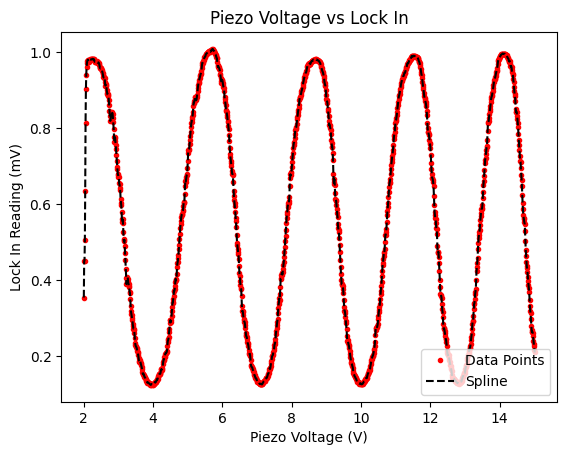

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(s1f1[0],s1f1[1], 'r.', label="Data Points")
ax.plot(s1f1[0],splines1f1(s1f1[0]),'k--', label="Spline")
ax.set_xlabel("Piezo Voltage (V)")
ax.set_ylabel("Lock In Reading (mV)")
ax.legend(loc=4)
ax.set_title("Piezo Voltage vs Lock In")

Text(0.5, 1.0, 'Piezo Voltage vs Lock In')

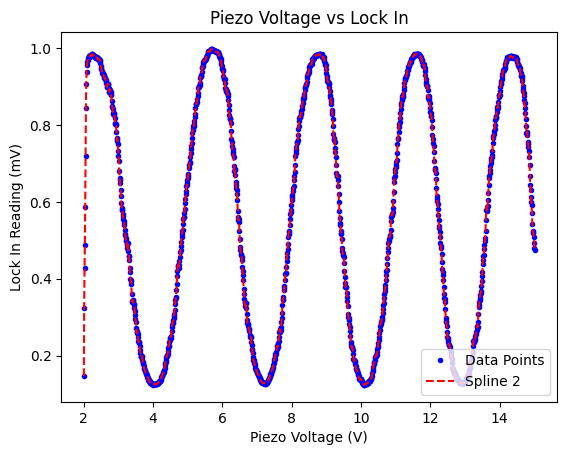

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(s1f2[0],s1f2[1], 'b.', label="Data Points")
ax.plot(s1f2[0],splines1f2(s1f2[0]),'r--', label="Spline 2")
ax.set_xlabel("Piezo Voltage (V)")
ax.set_ylabel("Lock In Reading (mV)")
ax.legend(loc=4)
ax.set_title("Piezo Voltage vs Lock In")

Text(0.5, 1.0, 'Piezo Voltage vs Lock In')

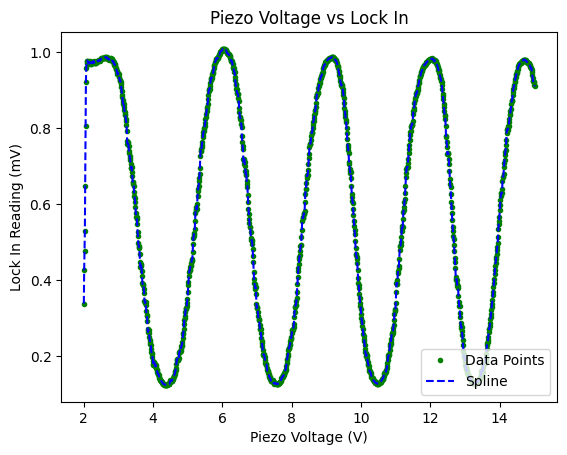

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(s1f3[0],s1f3[1], 'g.', label="Data Points")
ax.plot(s1f3[0],splines1f3(s1f3[0]),'b--', label="Spline")


ax.set_xlabel("Piezo Voltage (V)")
ax.set_ylabel("Lock In Reading (mV)")
ax.legend(loc=4)
ax.set_title("Piezo Voltage vs Lock In")

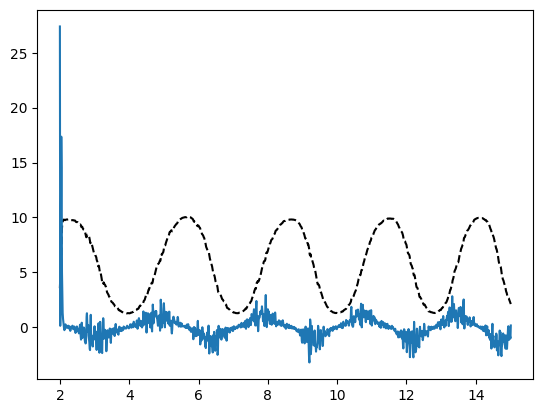

In [7]:
# Calculate x for max
firstdevs1f1=splines1f1.derivative(n=1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(s1f1[0],10*splines1f1(s1f1[0]),'k--', label="Spline")
ax.plot(s1f1[0],firstdevs1f1(s1f1[0]), '', label="Data Points")

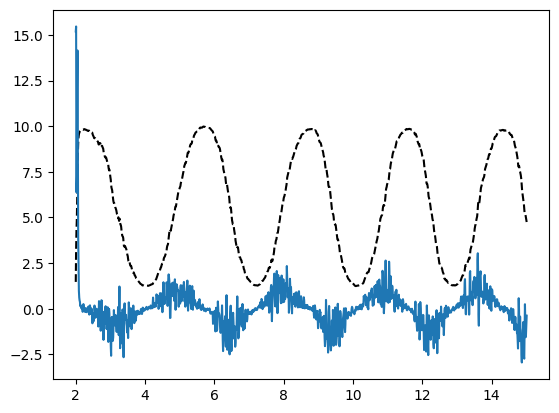

In [8]:
# Calculate x for max
firstdevs1f2=splines1f2.derivative(n=1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(s1f2[0],10*splines1f2(s1f2[0]),'k--', label="Spline")
ax.plot(s1f2[0],firstdevs1f2(s1f2[0]), '', label="Data Points")

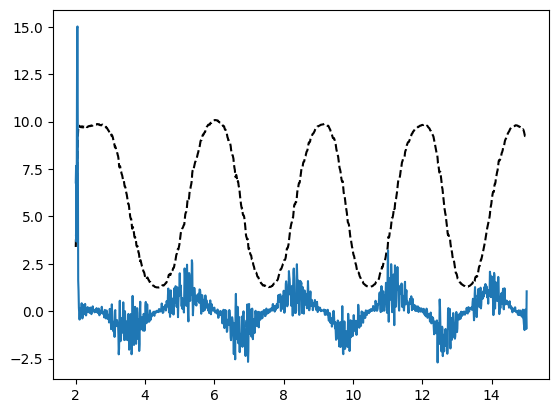

In [9]:
# Calculate x for max
firstdevs1f3=splines1f3.derivative(n=1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(s1f3[0],10*splines1f3(s1f3[0]),'k--', label="Spline")
ax.plot(s1f3[0],firstdevs1f3(s1f3[0]), '', label="Data Points")

In [10]:
firstpeakt1=opt.brentq(firstdevs1f1, 4.6, 6)
secondpeakt1=opt.brentq(firstdevs1f1, 8, 9)
thirdpeakt1= opt.brentq(firstdevs1f1, 11.5, 12)
fourthpeakt1= opt.brentq(firstdevs1f1, 13, 15)

print(f"Peaks for the first trail are: {firstpeakt1};{secondpeakt1};{thirdpeakt1};{fourthpeakt1}")

firstpeakt2=opt.brentq(firstdevs1f2, 5, 6.45)
secondpeakt2=opt.brentq(firstdevs1f2, 8, 9)
thirdpeakt2= opt.brentq(firstdevs1f2, 11.5, 12.5)
fourthpeakt2= opt.brentq(firstdevs1f2, 13.6, 15)

print(f"Peaks for the second trail are: {firstpeakt2};{secondpeakt2};{thirdpeakt2};{fourthpeakt2}")


firstpeakt3=opt.brentq(firstdevs1f3, 5, 6.45)
secondpeakt3=opt.brentq(firstdevs1f3, 8.5, 9.5)
thirdpeakt3= opt.brentq(firstdevs1f3, 11, 12.6)
fourthpeakt3= opt.brentq(firstdevs1f3, 13.6, 15)

print(f"Peaks for the second trail are: {firstpeakt3};{secondpeakt3};{thirdpeakt3};{fourthpeakt3}")

Peaks for the first trail are: 5.614141432306536;8.655974976398095;11.519252151964857;14.144507507421997
Peaks for the second trail are: 5.6921117300545925;8.7992935048115;11.545537441341487;14.452107324409345
Peaks for the second trail are: 6.052375912548266;9.17317933686838;11.941014049083046;14.718940848971108


In [11]:
firstwhmt1= opt.brentq(lambda x: splines1f1(x) - splines1f1(firstpeakt1) / 2, 6, 7) - opt.brentq(lambda x: splines1f1(x) - splines1f1(firstpeakt1) / 2, 4, 6)
secondwhmt1= opt.brentq(lambda x: splines1f1(x) - splines1f1(secondpeakt1) / 2, 9, 10) - opt.brentq(lambda x: splines1f1(x) - splines1f1(secondpeakt1) / 2, 7, 8)
thirdwhmt1= opt.brentq(lambda x: splines1f1(x) - splines1f1(secondpeakt1) / 2, 12, 13) - opt.brentq(lambda x: splines1f1(x) - splines1f1(secondpeakt1) / 2, 10, 11)

firstwhmt2= opt.brentq(lambda x: splines1f2(x) - splines1f2(firstpeakt2) / 2, 6.4, 6.7) - opt.brentq(lambda x: splines1f2(x) - splines1f2(firstpeakt2) / 2, 4, 5.5)
secondwhmt2= opt.brentq(lambda x: splines1f2(x) - splines1f2(secondpeakt2) / 2, 9, 10) - opt.brentq(lambda x: splines1f2(x) - splines1f2(secondpeakt2) / 2, 7, 8)
thirdwhmt2= opt.brentq(lambda x: splines1f2(x) - splines1f2(secondpeakt2) / 2, 12, 13) - opt.brentq(lambda x: splines1f2(x) - splines1f2(secondpeakt2) / 2, 10, 11)

firstwhmt3= opt.brentq(lambda x: splines1f3(x) - splines1f3(firstpeakt3) / 2, 6.4, 7) - opt.brentq(lambda x: splines1f3(x) - splines1f3(firstpeakt3) / 2, 4, 5.5)
secondwhmt3= opt.brentq(lambda x: splines1f3(x) - splines1f3(secondpeakt3) / 2, 9, 10) - opt.brentq(lambda x: splines1f3(x) - splines1f3(secondpeakt3) / 2, 8, 9)
thirdwhmt3= opt.brentq(lambda x: splines1f3(x) - splines1f3(secondpeakt3) / 2, 12, 13) - opt.brentq(lambda x: splines1f3(x) - splines1f3(secondpeakt3) / 2, 10, 11.5)

In [12]:
print(firstwhmt1, secondwhmt1, thirdwhmt1)
print(firstwhmt2, secondwhmt2, thirdwhmt2)
print(firstwhmt3, secondwhmt3, thirdwhmt3)

1.6629184634252203 1.5814291238545648 1.5164364897060327
1.688584841438944 1.5533450344418274 1.5024912891352482
1.6955814558941285 1.5648418529453654 1.5388397782322691


In [13]:
finess=np.array([(secondpeakt1 - firstpeakt1) / firstwhmt1, (thirdpeakt1 - secondpeakt1) / secondwhmt1, (fourthpeakt1 - thirdpeakt1) / thirdwhmt1,
                 (secondpeakt2 - firstpeakt2) / firstwhmt2, (thirdpeakt2 - secondpeakt2) / secondwhmt2, (fourthpeakt2 - thirdpeakt2) / thirdwhmt2,
                 (secondpeakt3 - firstpeakt3) / firstwhmt3, (thirdpeakt3 - secondpeakt3) / secondwhmt3, (fourthpeakt3 - thirdpeakt3) / thirdwhmt3])
finess

array([1.82921389, 1.81056307, 1.73120033, 1.84010995, 1.76795488,
       1.93450032, 1.84055058, 1.76876322, 1.8052086 ])

$$ Finess=F_i = \frac{\pi \sqrt{\frac{4R}{(1-R)^2}}}{2} $$


$$R=\frac{2 F_i^2 + π^2 - π \sqrt{4 F_i^2 + π^2}}{(2 F_i^2)} $$

In [14]:
r= lambda f_i: (2*f_i**2+np.pi**2-np.pi*np.sqrt(4*f_i**2+np.pi**2))/(2*f_i**2)

In [15]:
r(finess)

array([0.2110319 , 0.20822446, 0.19619754, 0.21266847, 0.20178299,
       0.2267271 , 0.21273459, 0.20190554, 0.20741706])

$$ Finess=F_i = \frac{\pi \sqrt{\frac{4R}{(1-R)^2}}}{2} $$


$$R=\frac{2 F_i^2 + π^2 - π \sqrt{4 F_i^2 + π^2}}{(2 F_i^2)} $$

In [16]:
r= lambda f_i: (2*f_i**2+np.pi**2-np.pi*np.sqrt(4*f_i**2+np.pi**2))/(2*f_i**2)

In [17]:
rset1=r(finess)

In [18]:
rset1

array([0.2110319 , 0.20822446, 0.19619754, 0.21266847, 0.20178299,
       0.2267271 , 0.21273459, 0.20190554, 0.20741706])